# MNIST

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn import preprocessing
from sklearn import metrics

from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
import warnings

warnings.filterwarnings('ignore')


## Load data

In [5]:
mnist_28x28_train = np.load("mnist_28x28_train.npy")

mnist_8x8_train = np.load("mnist_8x8_train.npy")
train_labels = np.load("train_labels.npy")

mnist_28x28_test = np.load("mnist_28x28_test.npy")
mnist_8x8_test = np.load("mnist_8x8_test.npy")

## Helpers

In [1]:
# Taken from https://matplotlib.org/3.3.2/gallery/lines_bars_and_markers/barchart.html#
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
def plot_models(models):

    # Prediction performance
    f1_scores = {}
    accuracy_scores = {}
    cross_scores = {}
    for (name, model) in models.items():
        prediction = model.predict(X_test)    

        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro') 
        accuracy_scores[name] = accuracy_score(y_test, prediction)
        f1_scores[name] = f1_score(y_test, prediction, average="weighted")
        cross_scores[name] = scores.mean()

    label_pos = np.arange(len(models.keys()))
    bar_width = 0.3
    fig, ax = plt.subplots(figsize = (15,8))
    rects1 = ax.bar(label_pos - bar_width, accuracy_scores.values(), bar_width, label='accuracy')
    rects2 = ax.bar(label_pos, f1_scores.values(), bar_width, label='f1 score')
    rects3 = ax.bar(label_pos + bar_width, cross_scores.values(), bar_width, label='cross validation mean')

    ax.set_xticks(label_pos)
    ax.set_xticklabels(models.keys())
    ax.legend()

    for rects in [rects1, rects2, rects3]:
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.3f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    fig.tight_layout()

    plt.show()
    return f1_scores
def compare_models_f1(models1, models2):
    f1_scores1 = {}
    f1_scores2 = {}
    
    for (name, model) in models1.items():
        prediction = model.predict(X_test)
        f1_scores1[name] = f1_score(y_test, prediction, average="weighted")

    for (name, model) in models2.items():
        prediction = model.predict(X_test)
        f1_scores2[name] = f1_score(y_test, prediction, average="weighted")
        
    fig, ax = plt.subplots(figsize=(15,8))
    
    index = np.arange(3)
    bar_width = 0.35

    old = ax.bar(index, f1_scores1.values(), bar_width,
                    label="Old")

    new = ax.bar(index+bar_width, f1_scores2.values(),
                     bar_width, label="New")
    
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(models1.keys())
    ax.legend()


    for rects in [old, new]:
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.3f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    fig.tight_layout()

    plt.show()
def print_grid_results(clf, X_test, y_test):
    print("Test set params:")
    print(clf.best_params_)
    print("Test set best score:")
    print(clf.best_score_)
    print("Grid scores on development set:")
    print()

    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))

    print("Scores on test set with best params: ")
    print()
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))
def plot_downsample_difference(models):
# Prediction performance
    f1_scores = {}
    accuracy_scores = {}
    cross_scores = {}

    prediction = models["Normal"].predict(X_test)    
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro') 
    accuracy_scores["Normal"] = accuracy_score(y_test, prediction)
    f1_scores["Normal"] = f1_score(y_test, prediction, average="weighted")
    cross_scores["Normal"] = scores.mean()

    prediction = models["Downsampled"].predict(X_test_downsampled)    
    scores = cross_val_score(model, X_train_downsampled, y_train_downsampled, cv=5, scoring='f1_macro') 
    accuracy_scores["Downsampled"] = accuracy_score(y_test_downsampled, prediction)
    f1_scores["Downsampled"] = f1_score(y_test_downsampled, prediction, average="weighted")
    cross_scores["Downsampled"] = scores.mean()


    label_pos = np.arange(len(models.keys()))
    bar_width = 0.3
    fig, ax = plt.subplots(figsize = (15,8))
    rects1 = ax.bar(label_pos - bar_width, accuracy_scores.values(), bar_width, label='accuracy')
    rects2 = ax.bar(label_pos, f1_scores.values(), bar_width, label='f1 score')
    rects3 = ax.bar(label_pos + bar_width, cross_scores.values(), bar_width, label='cross validation mean')

    ax.set_xticks(label_pos)
    ax.set_xticklabels(models.keys())
    ax.legend()

    for rects in [rects1, rects2, rects3]:
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.3f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    fig.tight_layout()

    plt.show()

##  Data exploration

### Question 1
We can see there's some loss of data on the interpolated image. We lose fine details such as little squiggles and fine lines in the handwriting but that shouldn't impact our training much with methods we're using. However, the downsampled dataset will take a lot less time to train and evaluate. We're guessing the original data would be better for methods with deeper feature extraction such as deep neural nets.

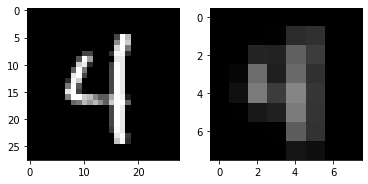

In [8]:
f, axarr = plt.subplots(1,2) 

axarr[0].imshow(mnist_28x28_test[0], cmap='gray', vmin=0, vmax=255)
axarr[1].imshow(mnist_8x8_test[0], cmap='gray', vmin=0, vmax=255)
print()

##  Data Preparations

### Question 1

We reshape our data (flattening the 8x8 image to a 1x64 array). Our methods either require or perform better on processed data, e.g. standardized or clamped between [0,1] or [-1,+1]. Initially, we chose to scale it with sklearn's `preprocessing.MinMaxScaler()` so our X lies between [-1,+1]. However, `preprocessing.Normalizer()` gave us significantly better performance on our preferred methods.

In [9]:
train_downsampled = mnist_8x8_train.reshape((mnist_8x8_train.shape[0], -1))
train_normal = mnist_28x28_train.reshape((mnist_28x28_train.shape[0], -1))

min_max_scaler = preprocessing.MinMaxScaler()
standard_scaler = preprocessing.StandardScaler()
normal_scaler = preprocessing.Normalizer()

train_downsampled
train_normal

scaler_type = "normal"

if scaler_type == "min_max":
    train_downsampled = min_max_scaler.fit_transform(train_downsampled)
    train_normal = min_max_scaler.fit_transform(train_normal)
elif scaler_type == "standard":
    train_downsampled = standard_scaler.fit_transform(train_downsampled)
    train_normal = standard_scaler.fit_transform(train_normal)      
elif scaler_type == "normal":
    train_downsampled = normal_scaler.fit_transform(train_downsampled)
    train_normal = normal_scaler.fit_transform(train_normal)      
    

A good idea is to check how balanced is our dataset.

In [10]:
for i in range(10):
    print(len(np.where(train_labels==i)[0]))

395
376
367
378
388
366
371
366
366
377


And from this we can see it's quite balanced. We can explore the dataset further, by plotting the heatmaps for the same classes. We can interpret 'heat' as correlation, which we'll use further down to reason about our classifiers.

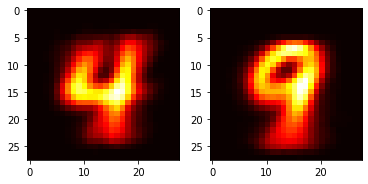

In [12]:
imin4 = np.where(train_labels==4)
im4 = mnist_28x28_train[imin4]

imin9 = np.where(train_labels==9)
im9 = mnist_28x28_train[imin9]

hm4 = im4.mean(axis=0)
hm9 = im9.mean(axis=0)

f, axarr = plt.subplots(1,2) 

axarr[0].imshow(hm4, cmap='hot', interpolation='nearest')
axarr[1].imshow(hm9, cmap='hot', interpolation='nearest')

## Experiments

In [30]:
# Set up models with default hyper-parameters
base_models = {
    "GaussianNB": GaussianNB(),
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=None, min_samples_leaf=2, random_state=42),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=3, weights="distance"),
    "LogisticRegression": LogisticRegression(C=10, penalty="none", random_state=42),
    "SVC": SVC(C=10, kernel="poly", random_state=42)
}

X_train, X_test, y_train, y_test = train_test_split(
    train_normal, train_labels, test_size=0.6, random_state=43)

##### Question 2

NB's performance isn't surprising. We're dealing with heavily correlated data, as we've shown in our Data Exploration part.

We also didn't expect much from the decision trees, however they're still doing surprisingly well on this type of data (just some ordered numbers and not categorical featues such as `house_has_roof: true` or `cat_is_black: false`).

As expected, the main contenders are the KNN classifier and the SVM. The models perform surprisingly well even with the default analysis.

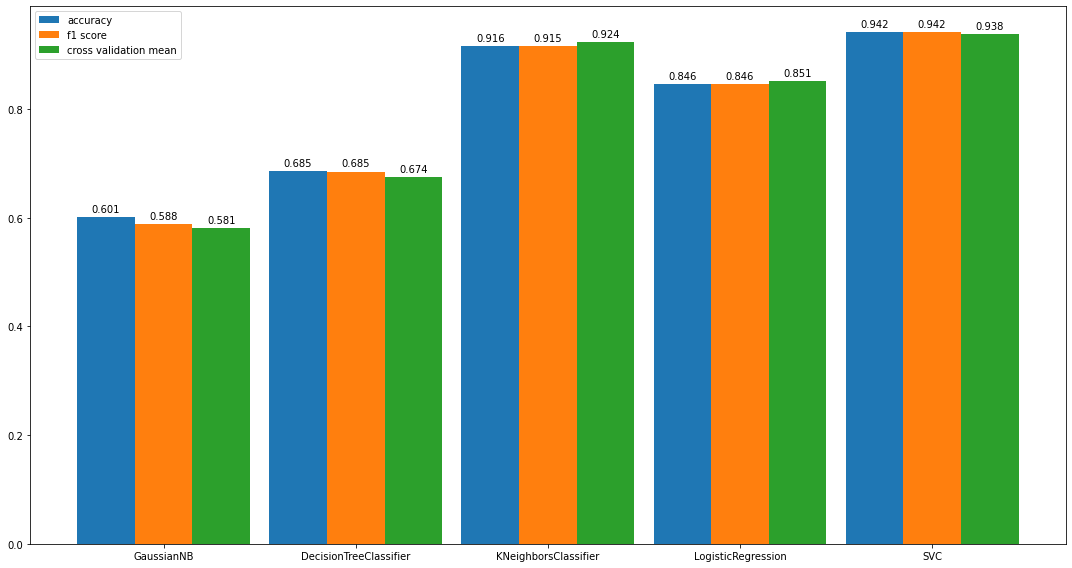

In [31]:
# Fit Models
for (name, model) in base_models.items():
    model.fit(X_train, y_train)
# Plot scores
default_f1_scores = plot_models(base_models)
print()

We'll take a look at the confusion matrices of the most interesting models:

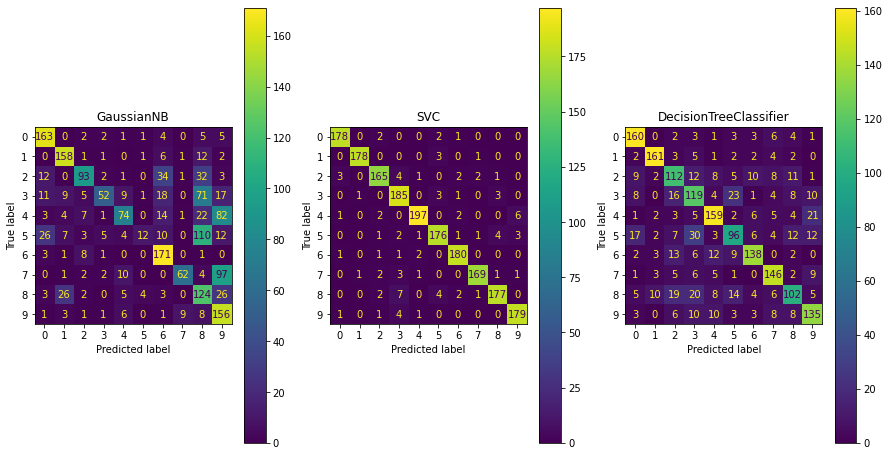

In [21]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,8))
metrics.plot_confusion_matrix(base_models["GaussianNB"], X_test, y_test, ax =ax1)
metrics.plot_confusion_matrix(base_models["SVC"], X_test, y_test, ax = ax2)
metrics.plot_confusion_matrix(base_models["DecisionTreeClassifier"], X_test, y_test, ax = ax3)

ax1.set_title("GaussianNB")
ax2.set_title("SVC")
ax3.set_title("DecisionTreeClassifier")

print()

Our best models' matrices mostly look the same so we think this would be a more interesting comparison. We can observe some interesting things on GaussianNB's properties. Since it doesn't factor in correlated features, we can see a lot of missclassifcations due to a number having a part of another number. We can see it consistantly mistakes then number `5` `4` for `9`. In handwriting, a 5 and a 4 can be 'completed' to a 9.

On the other hand, the SVC performs quite well on all classes without differences too big.

###### Global config

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import scipy.stats as stats
from sklearn.utils.fixes import loguniform

### Question 3
For hyperparmater tuning, we'll use sklearn's GridSearchCV to find out the best hyperparameters for each model.
We're focusing on the prime 2 methods we think are suitable for the problem (KNN and SVC), and also LogisticRegression since it performed well with the default parameters.
The parameters we settled on are in the global config above.

## SVC

After being unable to get our SVC score any higher, we changed our test size and data preparation strategy. it seems like using `preprocessing.normalize` and a 50/50 split was our best choice. We can now go on to find out the best choice for kernel, `C`-value and other hyperparams.

Surprisingly, the `poly` kernel performs better in this configuration than `rbf`. We started our C value search in ranges around `C=10`, progressively going down lower and lower, which is a good thing for the generalization of our model. After ruling out RBF, we do more tuning. Our optimal C value lies somewhere around 1.0 and the optimal degree isn't farm from the default at `4`. Searching for a better C value didn't make much sense, since the accuracy was pretty much the same for all values in the range `(0.9; 1.1)`. This resulted in an f1-score of about `0.95` on the test set.

In [37]:
param_grid = [{
    'C': np.linspace(0,10, num=10),
    'kernel': ['poly', 'rbf'], 
    'degree': [4],
    'gamma': ['scale'],
    'random_state': [42]
}
,
    {
        'C': [10],
        'kernel': ['poly'],
        'random_state': [42]
    
    }
]
clf = GridSearchCV(SVC(), param_grid,refit=True,verbose=2, n_jobs= -1)
clf.fit(X_train, y_train)

print_grid_results(clf, X_test,y_test)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:   51.0s finished


Test set params:
{'C': 1.1111111111111112, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 42}
Test set best score:
0.9433333333333331
Grid scores on development set:

nan (+/-nan) for {'C': 0.0, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 42}
nan (+/-nan) for {'C': 0.0, 'degree': 4, 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 42}
0.943 (+/-0.044) for {'C': 1.1111111111111112, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 42}
0.933 (+/-0.054) for {'C': 1.1111111111111112, 'degree': 4, 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 42}
0.943 (+/-0.044) for {'C': 2.2222222222222223, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 42}
0.935 (+/-0.041) for {'C': 2.2222222222222223, 'degree': 4, 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 42}
0.943 (+/-0.044) for {'C': 3.3333333333333335, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 42}
0.936 (+/-0.040) for {'C': 3.333333333333333

## KNN

Right off the start, our most important paramater, at `n_neighbors=4` or `n_neighbors=3`  seems to give us the best performance regardless of other settings. Changing our `weights` setting to `distance` gives us better performance too. Our naive interpretation is that by using the `distance` weight metric our classifier will be more sensitive to correlations in the data. The best result we've seen is a `0.94` f1-score on the test set.

In [109]:
param_grid = {
    'n_neighbors': [2,3,4],
    'weights': ['distance'],
    'algorithm': ['auto'],
}
clf = GridSearchCV(KNeighborsClassifier(), param_grid,refit=True,verbose=2, n_jobs= -1)
clf.fit(X_train, y_train)

print_grid_results(clf, X_test,y_test)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    3.0s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    4.2s finished


Test set params:
{'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'}
Test set best score:
0.9269333333333334
Grid scores on development set:

0.919 (+/-0.035) for {'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'distance'}
0.923 (+/-0.035) for {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
0.927 (+/-0.045) for {'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'}
Scores on test set with best params: 

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       204
           1       0.94      0.99      0.96       190
           2       0.95      0.87      0.91       171
           3       0.90      0.89      0.90       198
           4       0.95      0.85      0.90       181
           5       0.96      0.85      0.90       183
           6       0.92      0.98      0.95       184
           7       0.94      0.89      0.91       203
           8       0.90      0.91      0.91       173
           9   

## Logistic Regression

A quick few runs and we can see that the default parameters are indeed one of the best. The only optimisation we can do is increase (decrease) our stopping critera. This gives us an okay score of `0.89`. 

In [63]:
param_grid = {
    'C': np.linspace(6,8,num=10),
    'penalty': ['l2'],
    'solver': ['lbfgs', 'sag'],
    'tol': [1e-5]
}
clf = GridSearchCV(LogisticRegression(), param_grid,refit=True,verbose=2, n_jobs= -1, cv=5)
clf.fit(X_train, y_train)

print_grid_results(clf, X_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished


Test set params:
{'C': 7.555555555555555, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 1e-05}
Test set best score:
0.8874666666666666
Grid scores on development set:

0.884 (+/-0.040) for {'C': 6.0, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 1e-05}
0.884 (+/-0.040) for {'C': 6.0, 'penalty': 'l2', 'solver': 'sag', 'tol': 1e-05}
0.884 (+/-0.041) for {'C': 6.222222222222222, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 1e-05}
0.884 (+/-0.041) for {'C': 6.222222222222222, 'penalty': 'l2', 'solver': 'sag', 'tol': 1e-05}
0.884 (+/-0.042) for {'C': 6.444444444444445, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 1e-05}
0.884 (+/-0.041) for {'C': 6.444444444444445, 'penalty': 'l2', 'solver': 'sag', 'tol': 1e-05}
0.885 (+/-0.045) for {'C': 6.666666666666667, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 1e-05}
0.885 (+/-0.042) for {'C': 6.666666666666667, 'penalty': 'l2', 'solver': 'sag', 'tol': 1e-05}
0.886 (+/-0.047) for {'C': 6.888888888888889, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 1e-05}
0.887 (

##### Question 4 

The difference between the default parameter and our own surprisingly isn't that big. In fact, our choice of data preparation seemed to net us more accuracy in the end. Our cross-validation score is lower so we might've even overfitted a bit. We'll compare the results of our main contenders: 

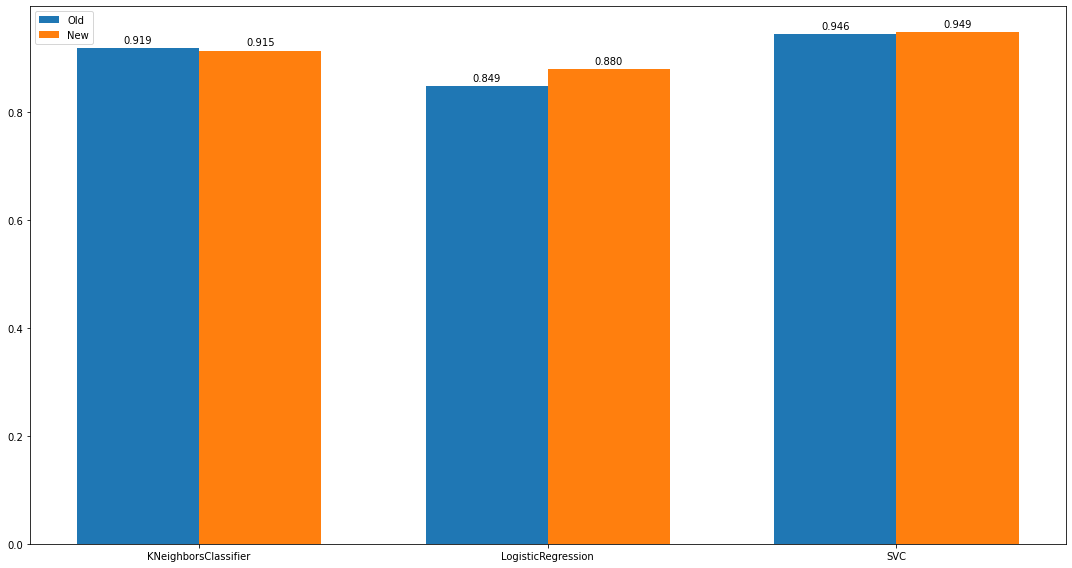

In [110]:
new_models = {
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=4, weights="distance", algorithm="auto"),
    "LogisticRegression": LogisticRegression(C=7.55, penalty='l2', tol=1e-05, random_state=42),
    "SVC": SVC(C=1.033, degree=4, gamma='scale', kernel='poly', random_state=42)
}
for (name, model) in new_models.items():
    model.fit(X_train, y_train)

svcs = {"Default SVC":new_models["SVC"], "Tuned SVC":base_models["SVC"]}
compare_models_f1({"KNeighborsClassifier":base_models["KNeighborsClassifier"],"LogisticRegression":base_models["LogisticRegression"],"SVC":base_models["SVC"]}, new_models)

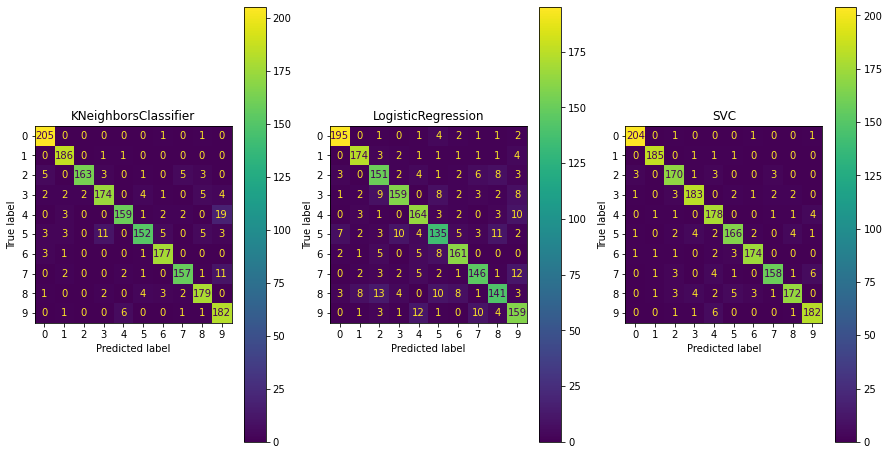

In [68]:

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,8))
metrics.plot_confusion_matrix(new_models["KNeighborsClassifier"], X_test, y_test, ax =ax1)
metrics.plot_confusion_matrix(new_models["LogisticRegression"], X_test, y_test, ax =ax2)
metrics.plot_confusion_matrix(new_models["SVC"], X_test, y_test, ax = ax3)
ax1.set_title("KNeighborsClassifier")
ax2.set_title("LogisticRegression")
ax3.set_title("SVC")
print()

### Question 5
A conjecture is that some methods can perform better on the downsampled set than the normal one due to less noise in the data. Here we'll compare the SVC and KNN:

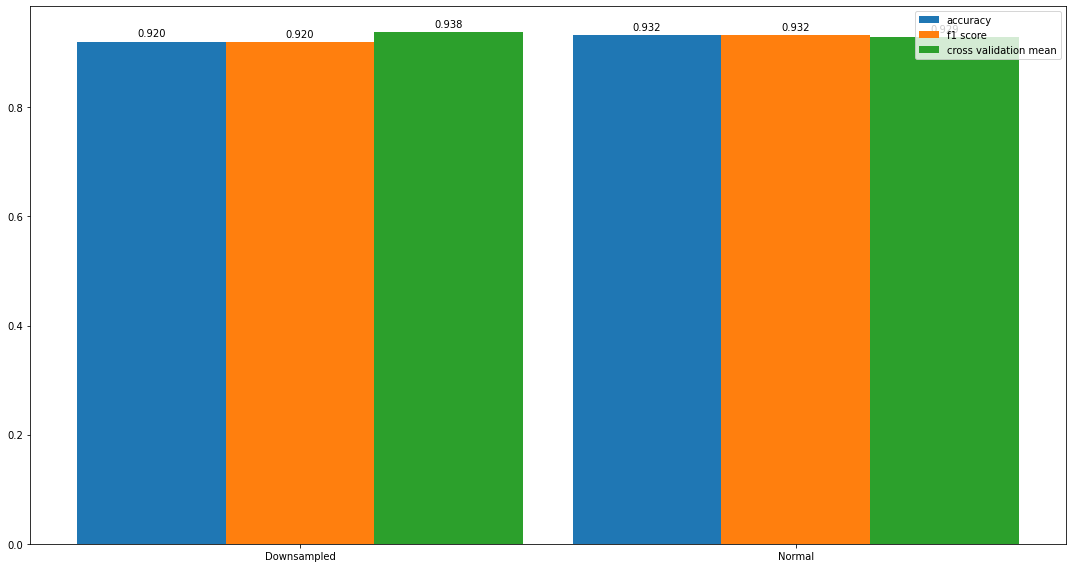

In [35]:
#TODO
X_train_downsampled, X_test_downsampled, y_train_downsampled, y_test_downsampled = train_test_split(
    train_downsampled, train_labels, test_size=0.5, random_state=42)

knns = {
    "Downsampled": KNeighborsClassifier(n_neighbors=4, weights="distance", algorithm="auto"),
    "Normal": KNeighborsClassifier(n_neighbors=4, weights="distance", algorithm="auto")
}

knns["Downsampled"].fit(X_train_downsampled, y_train_downsampled)
knns["Normal"].fit(X_train, y_train)
plot_downsample_difference(knns)

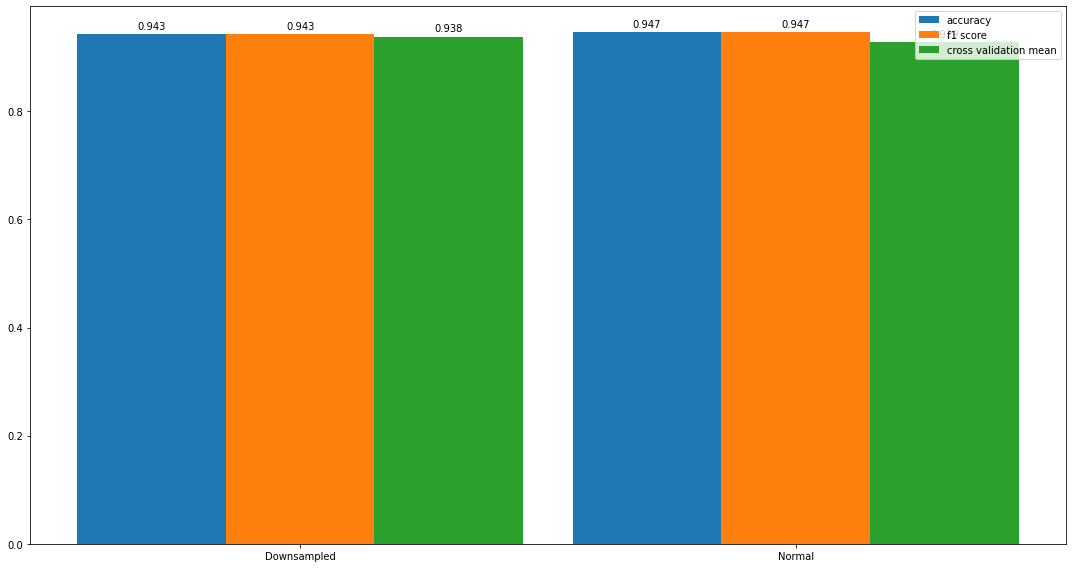

In [36]:
svcs = {
    "Downsampled": SVC(C=1.033, degree=4, gamma='scale', kernel='poly', random_state=42),
    "Normal": SVC(C=1.033, degree=4, gamma='scale', kernel='poly', random_state=42)

}

svcs["Downsampled"].fit(X_train_downsampled, y_train_downsampled)
svcs["Normal"].fit(X_train, y_train)
plot_downsample_difference(svcs)

Depending on the results you see when running our notebook, our general opinion is that downsampling can indeed improve the accuracy of some of our models and we've seen it work in some configurations. However we have a  gut feeling that using the normal dataset would give us a higher score on your test set.

### Question 6

In [113]:
#TODO
test_big = normal_scaler.fit_transform(mnist_28x28_test.reshape((mnist_28x28_test.shape[0], -1)))
prediction = new_models["SVC"].predict(test_big) #TODO replace this with you own prediction
pd.DataFrame(prediction).to_csv("GROUP_classes_problem_mnist.txt", index=False, header=False)

# Conclusion
As expected, because of the features of our dataset(non-linear decision boundry, correlation inside classes, balanced), our best models are the KNN and the SVC.

GaussianNB gave bad performance, as was expected. This is a dataset that relies heavily on correlation between features(pixels) and NB isn't fit for that. We noticed it making a lot of errors by just mistaking a number that just has `more` of another number,

Decision trees were also one we expected to do poorly mainly because of knowing the algorithm's strengths. Naively, it would be a lot harder to classify features which are just plain pixel values. If the dataset was a collection of more 'verbal' descriptions of digits (such as 'number of squiggles' or 'straight lines') it'd perform much better.

As a linear classifier we didn't expect Logistic Regression to perform well, but it showed some results. This is an incredibly simple model with very low overhead and surprisingly good results that definitely shouldn't be overlooked.

The KNN's performance is good as expected for problems such as these. It could suffer a bit from too much data noise. A closer look at the dataset reveals some numbers are drawn off-axis and this could confuse the model.

The SVC is best as expected on a multiclass problem with a small dataset. Like the KNN, it performs badly on nosiy data and as demonstrated, it performs better on the de-noised downsampled 8x8 dataset with the same aprameters.